In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf

In [2]:
data = pd.read_csv(r'D:\Courses\Machine Learning Practical\Credit card fraud detection\P39-Credit-Card-Fraud\Dataset\creditcard.csv')

In [3]:
data.describe(include = 'all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
sc = StandardScaler()

In [6]:
data['Normalized_amount'] = sc.fit_transform(data['Amount'].values.reshape(-1,1))

In [7]:
data = data.drop('Amount', axis = 1)
data = data.drop('Time', axis = 1)

In [8]:
inputs = pd.DataFrame()
inputs = data.drop('Class', axis = 1)

In [9]:
target = pd.DataFrame()
target = data['Class']

Model Building

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
inputs_train, inputs_test, target_train, target_test = train_test_split(
                                            inputs, target, test_size=0.2, random_state=32)

Deep Neural Network

In [12]:
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(units = 16,input_dim = 29, activation = 'relu'),
                            tf.keras.layers.Dense(24, activation = 'relu'),
                            tf.keras.layers.Dropout(0.5),
                            tf.keras.layers.Dense(20, activation = 'relu'),
                            tf.keras.layers.Dense(24, activation = 'relu'),
                            tf.keras.layers.Dense(1, activation = 'sigmoid')
                            ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

Training

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(inputs_train,target_train,batch_size=15,epochs=5, verbose = 2)

Epoch 1/5
15190/15190 - 13s - loss: 0.0074 - accuracy: 0.9989
Epoch 2/5
15190/15190 - 8s - loss: 0.0036 - accuracy: 0.9993
Epoch 3/5
15190/15190 - 8s - loss: 0.0035 - accuracy: 0.9994
Epoch 4/5
15190/15190 - 8s - loss: 0.0032 - accuracy: 0.9994
Epoch 5/5
15190/15190 - 8s - loss: 0.0032 - accuracy: 0.9994


In [15]:
acc = model.evaluate(inputs_test, target_test)

1781/1781 [==============================] - 1s 396us/step - loss: 0.0051 - accuracy: 0.9994


In [16]:
print(acc)

[0.005066305864602327, 0.9994031190872192]


In [17]:
pred = model.predict(inputs_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
cm = confusion_matrix(target_test, pred.round())

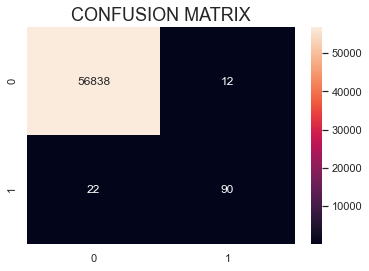

In [20]:
plt.title('CONFUSION MATRIX', fontsize = 18)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.show()

Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(n_estimators = 100)

In [23]:
rf.fit(inputs_train, target_train.values.ravel())

RandomForestClassifier()

In [24]:
rf_pred = rf.predict(inputs_test)

In [25]:
cm_rf = confusion_matrix(target_test, rf_pred)

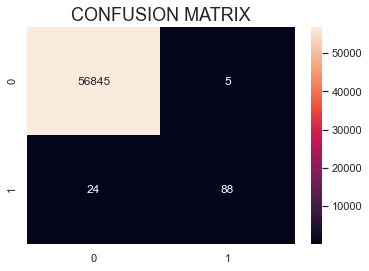

In [26]:
plt.title('CONFUSION MATRIX', fontsize = 18)
sns.heatmap(cm_rf, annot = True, fmt = 'g')
plt.show()

In [27]:
acc_rf = rf.score(inputs_test, target_test)

In [28]:
acc_rf

0.9994908886626171

Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt = DecisionTreeClassifier()

In [31]:
dt.fit(inputs_train, target_train.values.ravel())

DecisionTreeClassifier()

In [32]:
dt_pred = dt.predict(inputs_test)

In [33]:
acc_dt = dt.score(inputs_test, target_test)

In [34]:
acc_dt

0.9989115550718023

In [35]:
cm_dt = confusion_matrix(target_test, dt_pred)

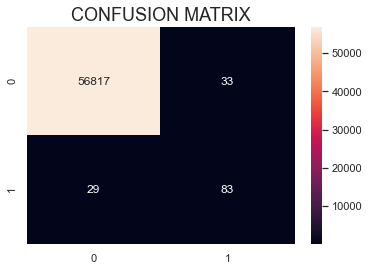

In [36]:
plt.title('CONFUSION MATRIX', fontsize = 18)
sns.heatmap(cm_dt, annot = True, fmt = 'g')
plt.show()

In [37]:
print(classification_report(target_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56850
           1       0.95      0.79      0.86       112

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



SMOTE

In [38]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
inputs_resample, target_resample = SMOTE().fit_sample(inputs, target.values.ravel())

In [41]:
inputs_resample = pd.DataFrame(inputs_resample)
target_resample = pd.DataFrame(target_resample)

In [42]:
inputs_train, inputs_test, target_train, target_test = train_test_split(
                                            inputs_resample, target_resample, test_size=0.2, random_state=32)

In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(inputs_train,target_train,batch_size=15,epochs=5, verbose = 2)

Epoch 1/5
30327/30327 - 24s - loss: 0.0282 - accuracy: 0.9906
Epoch 2/5
30327/30327 - 20s - loss: 0.0113 - accuracy: 0.9972
Epoch 3/5
30327/30327 - 20s - loss: 0.0092 - accuracy: 0.9978
Epoch 4/5
30327/30327 - 17s - loss: 0.0081 - accuracy: 0.9982
Epoch 5/5
30327/30327 - 17s - loss: 0.0075 - accuracy: 0.9983


In [44]:
test_loss, acc_sm = model.evaluate(inputs_test, target_test)

3554/3554 [==============================] - 1s 399us/step - loss: 0.0066 - accuracy: 0.9985


In [45]:
print('Test Loss : {0:.2f}. \nModel Accuracy (using SMOTE) is : {1:.2f}%'.format(test_loss,acc_sm*100))

Test Loss : 0.01. 
Model Accuracy (using SMOTE) is : 99.85%


In [46]:
pred_sm = model.predict(inputs_test)
cm_sm = confusion_matrix(target_test, pred_sm.round())

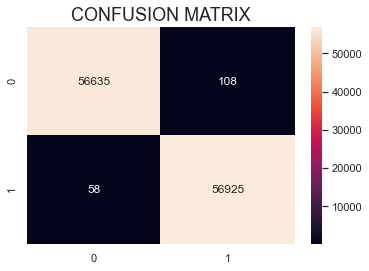

In [47]:
plt.title('CONFUSION MATRIX', fontsize = 18)
sns.heatmap(cm_sm, annot = True, fmt = 'g')
plt.show()

In [48]:
print(classification_report(target_test, pred_sm.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56743
           1       1.00      1.00      1.00     56983

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [49]:
pred_sm_f = model.predict(inputs)
cm_sm_f = confusion_matrix(target, pred_sm_f.round())

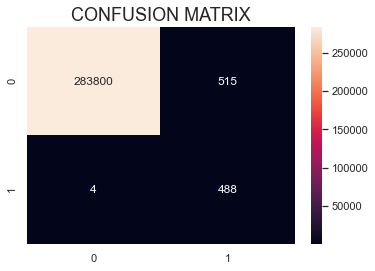

In [51]:
plt.title('CONFUSION MATRIX', fontsize = 18)
sns.heatmap(cm_sm_f, annot = True, fmt = 'g')
plt.show()